In [2]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
import pandas as pd

accidents = pd.read_csv('./Accidents0514.csv')
accidents.dropna(how='any', inplace=True)

casualites = pd.read_csv('./Casualties0514.csv')
casualites.dropna(how='any', inplace=True)

vehices = pd.read_csv('./Vehicles0514.csv')
vehices.dropna(how='any', inplace=True)

df = pd.DataFrame()

mergeData = pd.merge(pd.merge(accidents, casualites,on='Accident_Index'), vehices, on='Accident_Index')
df[['Accident_Index', 'Age_of_Driver', 'Accident_Severity', 'Weather_Conditions', 'Road_Surface_Conditions', 'Journey_Purpose_of_Driver', 'Day_of_Week', 'Time', 'Speed_limit']] = mergeData[['Accident_Index', 'Age_of_Driver', 'Accident_Severity', 'Weather_Conditions', 'Road_Surface_Conditions', 'Journey_Purpose_of_Driver', 'Day_of_Week', 'Time', 'Speed_limit']]
#인덱스, 운전자 연령, 사고 심각도, 날씨, 도로표면상태, 운전목적, 요일, 시간, 도로 속도 제한
print(df.info())
df.to_csv('Drive.csv')

<ipython-input-1-06098ecddcf5>:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv('./Accidents0514.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004836 entries, 0 to 4004835
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Accident_Index             object
 1   Age_of_Driver              int64 
 2   Accident_Severity          int64 
 3   Weather_Conditions         int64 
 4   Road_Surface_Conditions    int64 
 5   Journey_Purpose_of_Driver  int64 
 6   Day_of_Week                int64 
 7   Time                       object
 8   Speed_limit                int64 
dtypes: int64(7), object(2)
memory usage: 275.0+ MB
None


<ipython-input-2-010803bb35c1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = pd.cut(df['Age_of_Driver'], bins=bins, labels=labels, right=True) #연령 그룹화
<ipython-input-2-010803bb35c1>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_severity = df.groupby('Age_Group')


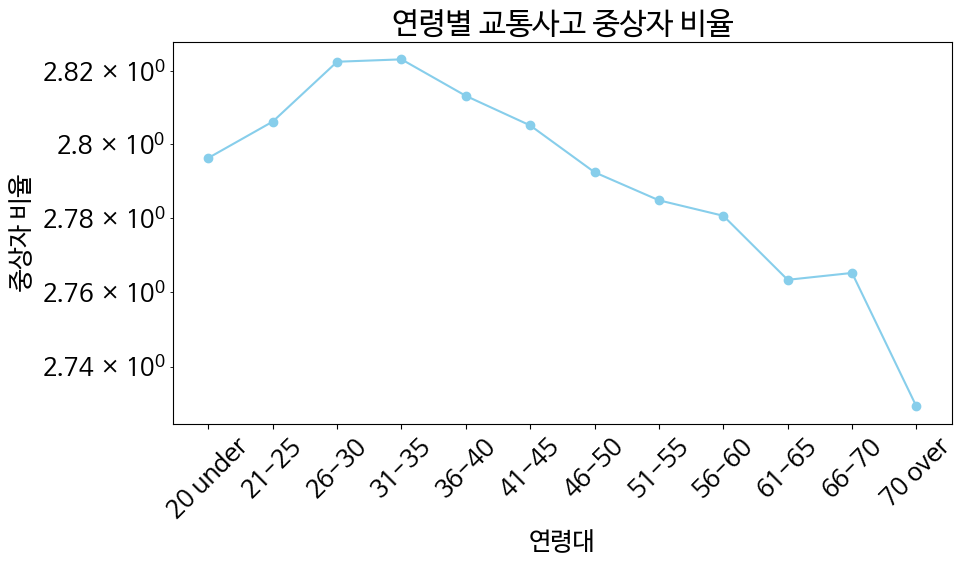

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive = pd.read_csv("./Drive.csv")
Drive.replace(-1, np.nan, inplace=True)
Drive.dropna(inplace=True)

df = Drive.loc[:, ['Age_of_Driver', 'Accident_Severity']]
df = df[df['Age_of_Driver'] > 17] # 17이상

bins = [17, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 100]
labels = ['20 under', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '70 over']

df['Age_Group'] = pd.cut(df['Age_of_Driver'], bins=bins, labels=labels, right=True) #연령 그룹화
df.drop('Age_of_Driver', axis=1, inplace=True)

def count(x):
  return x[x!=1].sum()/x.count() #경상제외

age_severity = df.groupby('Age_Group')
data = age_severity.agg(count)
data = data.reset_index()

plt.figure(figsize=(10, 6))
plt.plot(data['Age_Group'], data['Accident_Severity'], marker='o', linestyle='-', color='skyblue')

plt.xlabel('연령대')
plt.ylabel('중상자 비율')
plt.title('연령별 교통사고 중상자 비율')
plt.xticks(rotation=45)

plt.yscale('log')
plt.tight_layout()
plt.show()

